# Bank Loan Analsis

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

In [3]:
df = pd.read_excel("D:/Final Project - Finance/Reports/financial_loan_data_excel.xlsx")

In [4]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [5]:
df.tail()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,2021-07-11,2021-05-16,2021-05-16,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,2021-10-11,2021-04-16,2021-05-16,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,2021-09-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,2021-10-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677
38575,682952,NY,INDIVIDUAL,4 years,Allen Edmonds,F,RENT,2021-07-11,2021-05-16,2021-05-16,...,F3,60 months,Verified,80000.0,0.0600,486.86,0.2099,18000,7,27679


### Metadata of data

In [13]:
print("No of Rows & Columns:", df.shape)

No of Rows & Columns: (38576, 24)


In [14]:
df.info

<bound method DataFrame.info of             id address_state application_type emp_length  \
0      1077430            GA       INDIVIDUAL   < 1 year   
1      1072053            CA       INDIVIDUAL    9 years   
2      1069243            CA       INDIVIDUAL    4 years   
3      1041756            TX       INDIVIDUAL   < 1 year   
4      1068350            IL       INDIVIDUAL  10+ years   
...        ...           ...              ...        ...   
38571   803452            NJ       INDIVIDUAL   < 1 year   
38572   970377            NY       INDIVIDUAL    8 years   
38573   875376            CA       INDIVIDUAL    5 years   
38574   972997            NY       INDIVIDUAL    5 years   
38575   682952            NY       INDIVIDUAL    4 years   

                             emp_title grade home_ownership issue_date  \
0                                Ryder     C           RENT 2021-02-11   
1                       MKC Accounting     E           RENT 2021-01-01   
2                Chemat T

### Data Types

In [15]:
df.dtypes

id                                int64
address_state                    object
application_type                 object
emp_length                       object
emp_title                        object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
loan_status                      object
next_payment_date        datetime64[ns]
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                       int64
total_acc                         int64
total_payment                     int64
dtype: object

In [17]:
df.describe()

,id,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576,38576,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
min,5.473400e+04,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000
std,2.113246e+05,NaN,NaN,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777


### Total Loan Applications

In [19]:
total_loan_application = df["id"].count()
print("Total Loan Applications:", total_loan_application)

Total Loan Applications: 38576


### MTD Total Loan Applications

In [31]:
latest_issue_date = df["issue_date"].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df["issue_date"].dt.year == latest_year) & (df["issue_date"].dt.month == latest_month)]

mtd_loan_applications = mtd_data["id"].count()

print(f"MTD Loan Applications (for {latest_issue_date.strftime("%B %Y")}):{mtd_loan_applications}")

MTD Loan Applications (for December 2021):4314


### Total Funded Amount

In [180]:
total_funded_amount_millions = total_funded_amount/ 1000000
print("Total Funded Amount: ${:.2f}M". format(total_funded_amount_millions))

Total Funded Amount: $435.76M


### MTD Total Funded Amount

In [181]:
latest_issue_date = df["issue_date"].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df["issue_date"].dt.year == latest_year) & (df["issue_date"].dt.month == latest_month)]

mtd_total_funded_amount = mtd_data["loan_amount"].sum()
mtd_total_funded_amount_million = mtd_total_funded_amount/1000000

print(f"MTD Total Funded Amount (for {latest_issue_date.strftime("%B %Y")}): ${mtd_total_funded_amount_million:.2f}M".format(mtd_total_funded_amount_million))

MTD Total Funded Amount (for December 2021): $53.98M


### Total Received Amount

In [182]:
total_received_amount_millions = total_received_amount/ 1000000
print("Total Received Amount: ${:.2f}M". format(total_received_amount_millions))

Total Received Amount: $473.07M


### MTD Total Received Amount

In [183]:
latest_issue_date = df["issue_date"].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df["issue_date"].dt.year == latest_year) & (df["issue_date"].dt.month == latest_month)]

mtd_total_received_amount = mtd_data["total_payment"].sum()
mtd_total_received_amount_million = mtd_total_received_amount/1000000

print(f"MTD Total Received Amount (for {latest_issue_date.strftime("%B %Y")}): ${mtd_total_received_amount_million:.2f}M".format(mtd_total_received_amount_million))

MTD Total Received Amount (for December 2021): $58.07M


### Average Interest Rate

In [184]:
average_interest_rate = df["int_rate"].mean()*100
print("Average Interest Rate: {:.2f}%".format(average_interest_rate))

Average Interest Rate: 12.05%


### Average Debt-To-Income Ratio (DTI)

In [185]:
average_dti = df["dti"].mean()*100
print("Average DTI: {:.2f}%".format(average_dti))

Average DTI: 13.33%


### Good Loan Metrics

In [82]:
good_loans = df[df["loan_status"].isin(["Fully Paid", "Current"])]

total_loan_applications = df["id"].count()

good_loan_applications = good_loans["id"].count()
good_loan_funded_amount = good_loans["loan_amount"].sum()
good_loan_received_amount = good_loans["total_payment"].sum()

good_loan_funded_amount_million = good_loan_funded_amount / 1_000_000
good_loan_received_amount_million = good_loan_received_amount / 1_000_000

good_loan_percentage = (good_loan_applications / total_loan_applications) * 100

print("Good Loan Applications:", good_loan_applications)
print("Good Loan Funded Amount (in Millions): {:.2f}M".format(good_loan_funded_amount_million))
print("Good Loan Received Amount (in Millions): {:.2f}M".format(good_loan_received_amount_million))
print("Percentage of Good Loan Applications: {:.2f}%".format(good_loan_percentage))

Good Loan Applications: 33243
Good Loan Funded Amount (in Millions): 370.22M
Good Loan Received Amount (in Millions): 435.79M
Percentage of Good Loan Applications: 86.18%


### Bad Loan Metrics

In [83]:
bad_loans = df[df["loan_status"].isin(["Charged Off"])]

total_loan_applications = df["id"].count()

bad_loan_applications = bad_loans["id"].count()
bad_loan_funded_amount = bad_loans["loan_amount"].sum()
bad_loan_received_amount = bad_loans["total_payment"].sum()

bad_loan_funded_amount_million = bad_loan_funded_amount / 1_000_000
bad_loan_received_amount_million = bad_loan_received_amount / 1_000_000

bad_loan_percentage = (bad_loan_applications / total_loan_applications) * 100

print("Bad Loan Applications:", bad_loan_applications)
print("Bad Loan Funded Amount (in Millions): {:.2f}M".format(bad_loan_funded_amount_million))
print("Bad Loan Received Amount (in Millions): {:.2f}M".format(bad_loan_received_amount_million))
print("Percentage of Bad Loan Applications: {:.2f}%".format(bad_loan_percentage))

Bad Loan Applications: 5333
Bad Loan Funded Amount (in Millions): 65.53M
Bad Loan Received Amount (in Millions): 37.28M
Percentage of Bad Loan Applications: 13.82%


### Monthly Trends by Issue Date for Total Funded Amount

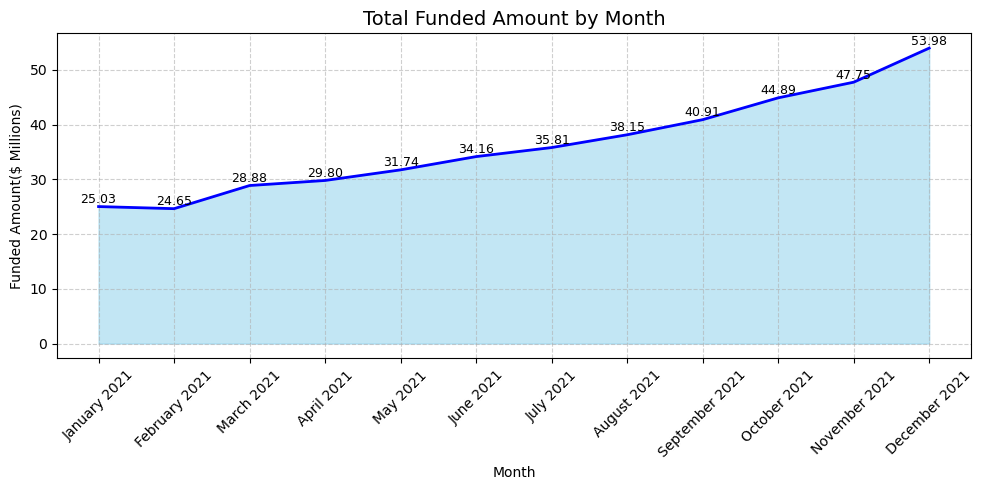

In [88]:
monthly_funded = (
    df.sort_values("issue_date")
        .assign(month_name=lambda x: x["issue_date"].dt.strftime("%B %Y"))
        .groupby("month_name", sort=False)["loan_amount"]
        .sum()
        .div(1_000_000)
        .reset_index(name="loan_amount_millions")
)

plt.figure(figsize =(10,5))
plt.fill_between(monthly_funded["month_name"], monthly_funded["loan_amount_millions"], color="skyblue", alpha = 0.5)
plt.plot(monthly_funded["month_name"], monthly_funded["loan_amount_millions"], color="blue", linewidth=2)

for i, row in monthly_funded.iterrows():
    plt.text(i, row["loan_amount_millions"] + 0.1, f"{row["loan_amount_millions"]:.2f}",
             ha="center", va="bottom", fontsize=9, rotation=0, color="black")

plt.title("Total Funded Amount by Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Funded Amount($ Millions)")
plt.xticks(ticks=range(len(monthly_funded)), labels=monthly_funded["month_name"], rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### Monthly Trends by Issue Date for Total Received Amount

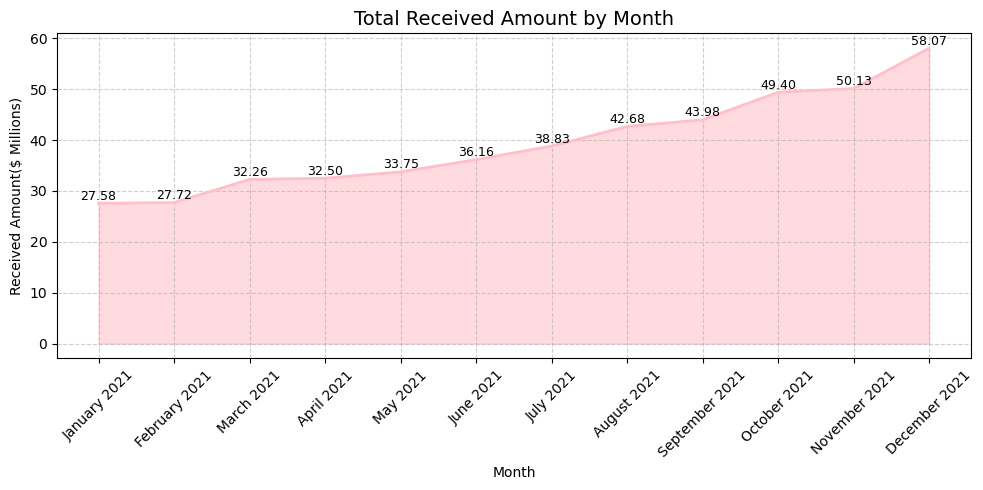

In [90]:
monthly_received = (
    df.sort_values("issue_date")
        .assign(month_name=lambda x: x["issue_date"].dt.strftime("%B %Y"))
        .groupby("month_name", sort=False)["total_payment"]
        .sum()
        .div(1_000_000)
        .reset_index(name="received_amount_millions")
)

plt.figure(figsize =(10,5))
plt.fill_between(monthly_received["month_name"], monthly_received["received_amount_millions"], color="lightpink", alpha = 0.5)
plt.plot(monthly_received["month_name"], monthly_received["received_amount_millions"], color="pink", linewidth=2)

for i, row in monthly_received.iterrows():
    plt.text(i, row["received_amount_millions"] + 0.1, f"{row["received_amount_millions"]:.2f}",
             ha="center", va="bottom", fontsize=9, rotation=0, color="black")

plt.title("Total Received Amount by Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Received Amount($ Millions)")
plt.xticks(ticks=range(len(monthly_received)), labels=monthly_received["month_name"], rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### Monthly Trends by Issue Date for Total Loan Application

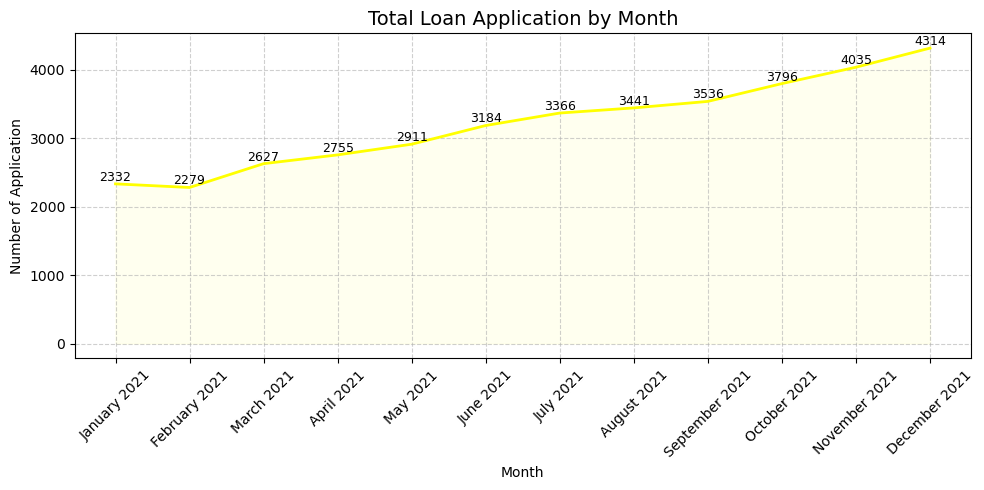

In [99]:
monthly_application = (
    df.sort_values("issue_date")
        .assign(month_name=lambda x: x["issue_date"].dt.strftime("%B %Y"))
        .groupby("month_name", sort=False)["id"]
        .count()
        .reset_index(name="loan_application_count")
)

plt.figure(figsize =(10,5))
plt.fill_between(monthly_application["month_name"], monthly_application["loan_application_count"], color="lightyellow", alpha = 0.5)
plt.plot(monthly_application["month_name"], monthly_application["loan_application_count"], color="yellow", linewidth=2)

for i, row in monthly_application.iterrows():
    plt.text(i, row["loan_application_count"] + 0.5, f"{row["loan_application_count"]}",
             ha="center", va="bottom", fontsize=9, rotation=0, color="black")

plt.title("Total Loan Application by Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Application")
plt.xticks(ticks=range(len(monthly_application)), labels=monthly_application["month_name"], rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### Regional Analysis by State for Total Funded Amount

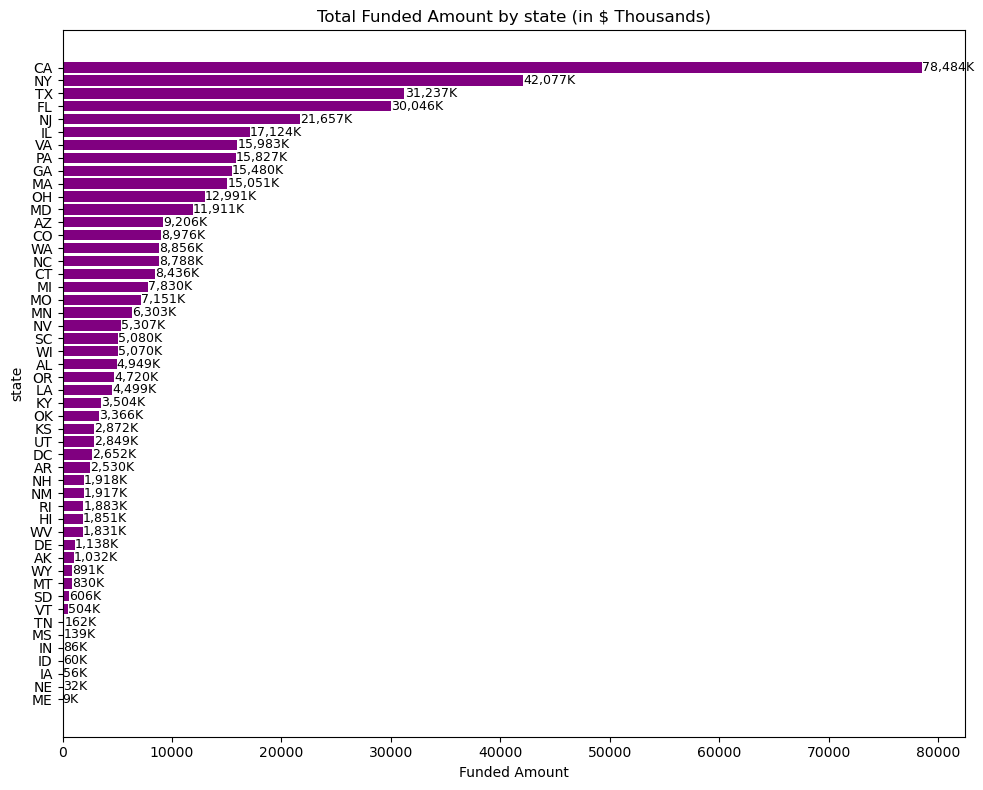

In [123]:
state_funded = df.groupby("address_state")["loan_amount"].sum().sort_values(ascending=True)
state_funded_thousands = state_funded /1000

plt.figure(figsize=(10, 8))
bars = plt.barh(state_funded_thousands.index, state_funded_thousands.values, color = "purple")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2,
            f'{width:,.0f}K', va="center", fontsize =9)

plt.title("Total Funded Amount by state (in $ Thousands)")
plt.xlabel("Funded Amount")
plt.ylabel("state")
plt.tight_layout()
plt.show()

### Regional Analysis by State for Total Received Amount

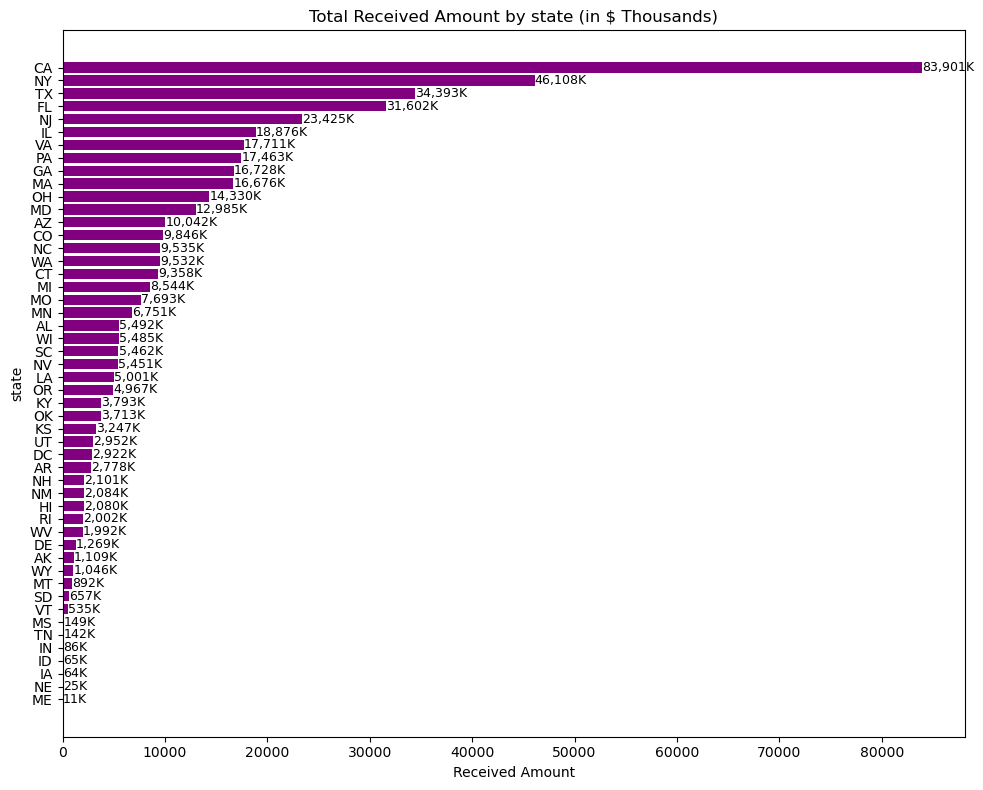

In [122]:
state_received = df.groupby("address_state")["total_payment"].sum().sort_values(ascending=True)
state_received_thousands = state_received /1000

plt.figure(figsize=(10, 8))
bars = plt.barh(state_received_thousands.index, state_received_thousands.values, color = "purple")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2,
            f'{width:,.0f}K', va="center", fontsize =9)

plt.title("Total Received Amount by state (in $ Thousands)")
plt.xlabel("Received Amount")
plt.ylabel("state")
plt.tight_layout()
plt.show()

### Regional Analysis by State for Total Loan Application

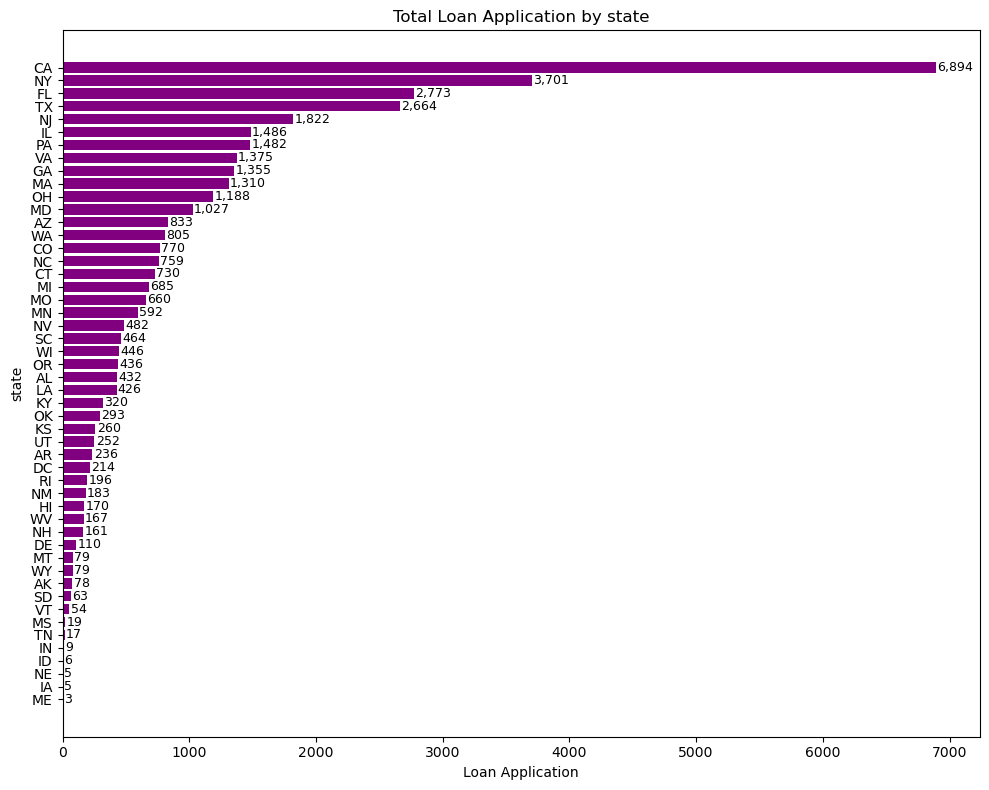

In [119]:
state_application = df.groupby("address_state")["id"].count().sort_values(ascending=True)

plt.figure(figsize=(10, 8))
bars = plt.barh(state_application.index, state_application.values, color = "purple")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2,
            f'{width:,.0f}', va="center", fontsize =9)

plt.title("Total Loan Application by state")
plt.xlabel("Loan Application")
plt.ylabel("state")
plt.tight_layout()
plt.show()

### Loan Term Analysis for Total Funded Amount

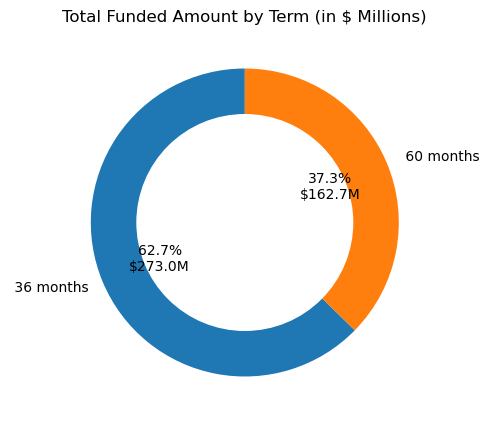

In [127]:
term_funded_millions = df.groupby("term")["loan_amount"].sum() / 1000000

plt.figure(figsize = (5,5))
plt.pie(
    term_funded_millions,
    labels = term_funded_millions.index,
    autopct = lambda p: f"{p:.1f}%\n${p*sum(term_funded_millions)/100:.1f}M",
    startangle = 90,
    wedgeprops = {"width": 0.4}
)
plt.gca().add_artist(plt.Circle((0,0), 0.70, color = "white"))
plt.title("Total Funded Amount by Term (in $ Millions)")
plt.show()

### Loan Term Analysis for Total Received Amount

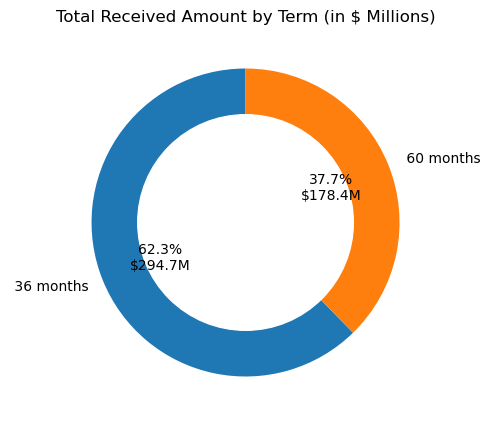

In [130]:
term_received_millions = df.groupby("term")["total_payment"].sum() / 1000000

plt.figure(figsize = (5,5))
plt.pie(
    term_received_millions,
    labels = term_received_millions.index,
    autopct = lambda p: f"{p:.1f}%\n${p*sum(term_received_millions)/100:.1f}M",
    startangle = 90,
    wedgeprops = {"width": 0.4}
)
plt.gca().add_artist(plt.Circle((0,0), 0.70, color = "white"))
plt.title("Total Received Amount by Term (in $ Millions)")
plt.show()

### Loan Term Analysis for Total Loan Application

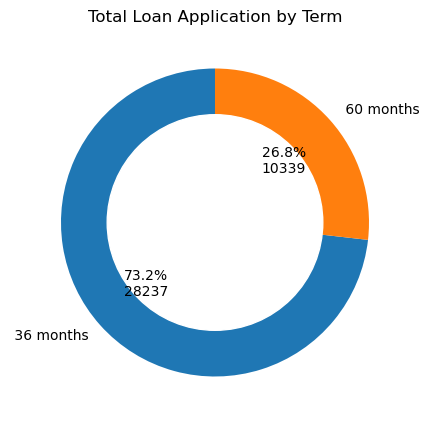

In [171]:
term_application = df.groupby("term")["id"].count()

plt.figure(figsize = (5,5))
plt.pie(
    term_application,
    labels = term_application.index,
    autopct = lambda p: f"{p:.1f}%\n{p*sum(term_application)/100:.0f}",
    startangle = 90,
    wedgeprops = {"width": 0.4}
)
plt.gca().add_artist(plt.Circle((0,0), 0.70, color = "white"))
plt.title("Total Loan Application by Term")
plt.show()

### Employee Length Analysis for Total Funded Amount

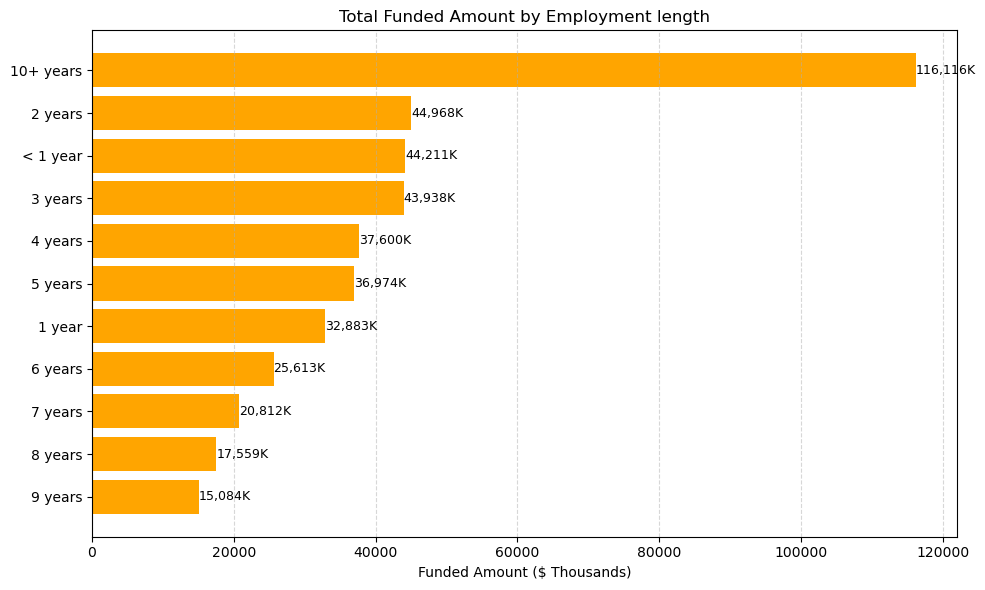

In [145]:
emp_funded = df.groupby("emp_length")["loan_amount"] .sum().sort_values()/1000

plt.figure(figsize=(10, 6))
bars = plt.barh(emp_funded.index, emp_funded.values, color = "orange")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
            f'{width:,.0f}K', va="center", fontsize =9)

plt.title("Total Funded Amount by Employment length")
plt.xlabel("Funded Amount ($ Thousands)")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

### Employee Length Analysis for Total Received Amount

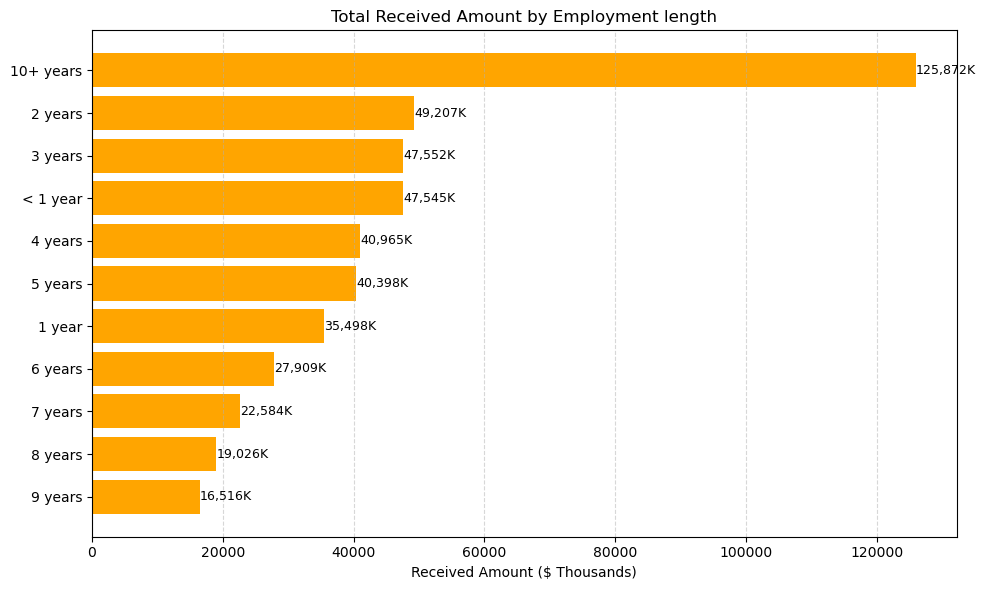

In [146]:
emp_received = df.groupby("emp_length")["total_payment"] .sum().sort_values()/1000

plt.figure(figsize=(10, 6))
bars = plt.barh(emp_received.index, emp_received.values, color = "orange")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
            f'{width:,.0f}K', va="center", fontsize =9)

plt.title("Total Received Amount by Employment length")
plt.xlabel("Received Amount ($ Thousands)")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

### Employee Length Analysis for Total Loan Application

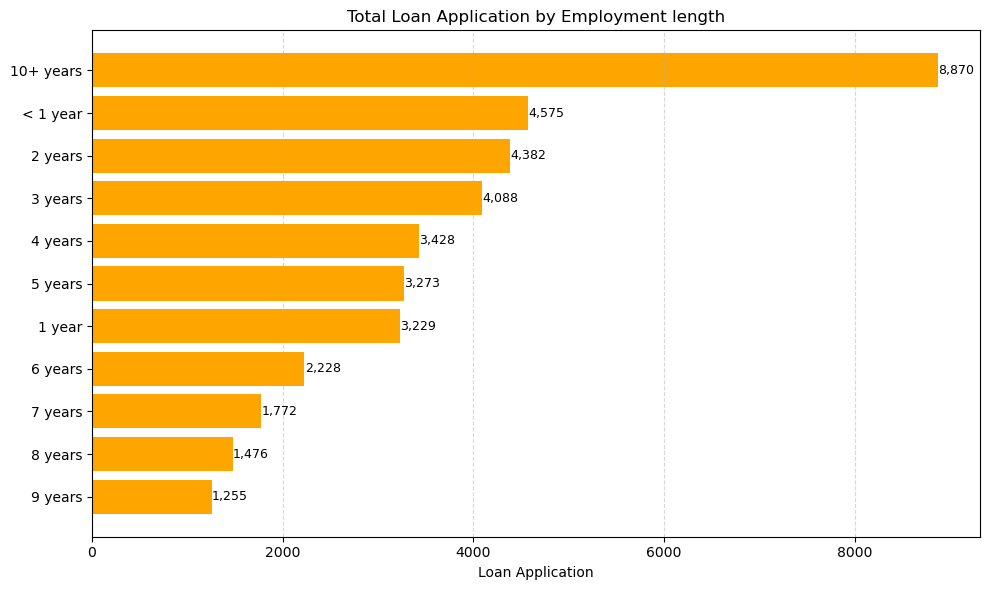

In [172]:
emp_application = df.groupby("emp_length")["id"].count().sort_values()

plt.figure(figsize=(10, 6))
bars = plt.barh(emp_application.index, emp_application.values, color = "orange")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
            f'{width:,.0f}', va="center", fontsize =9)

plt.title("Total Loan Application by Employment length")
plt.xlabel("Loan Application")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

### Loan Purpose for Total Funded Amount

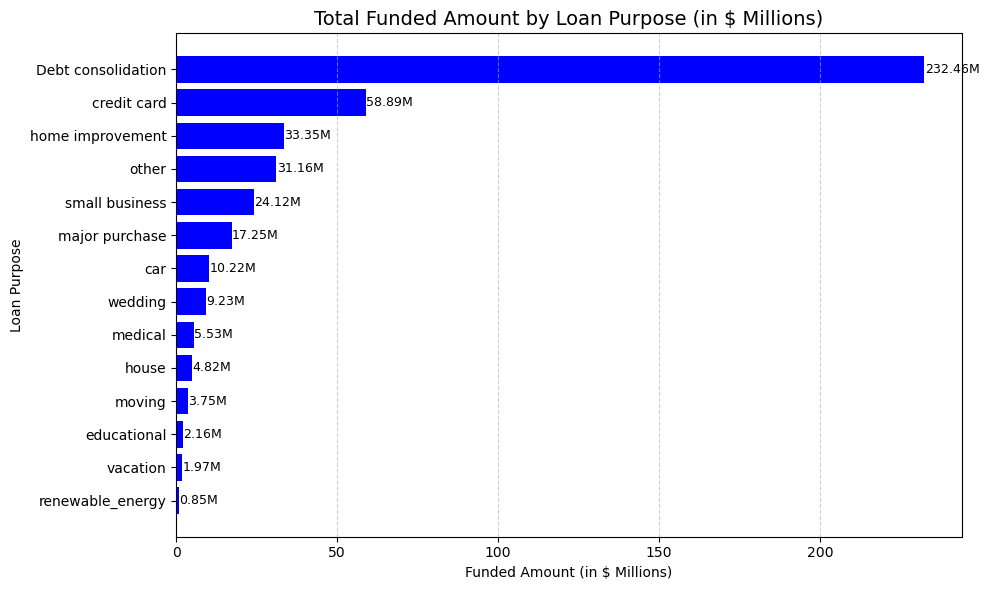

In [153]:
purpose_funded_millions = df.groupby("purpose")["loan_amount"].sum().sort_values() / 1000000

plt.figure(figsize=(10, 6))
bars = plt.barh(purpose_funded_millions.index, purpose_funded_millions.values, color = "blue")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height() / 2,
            f'{width:.2f}M', va="center", fontsize =9)

plt.title("Total Funded Amount by Loan Purpose (in $ Millions)", fontsize =14)
plt.xlabel("Funded Amount (in $ Millions)")
plt.ylabel("Loan Purpose")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### Loan Purpose for Total Received Amount

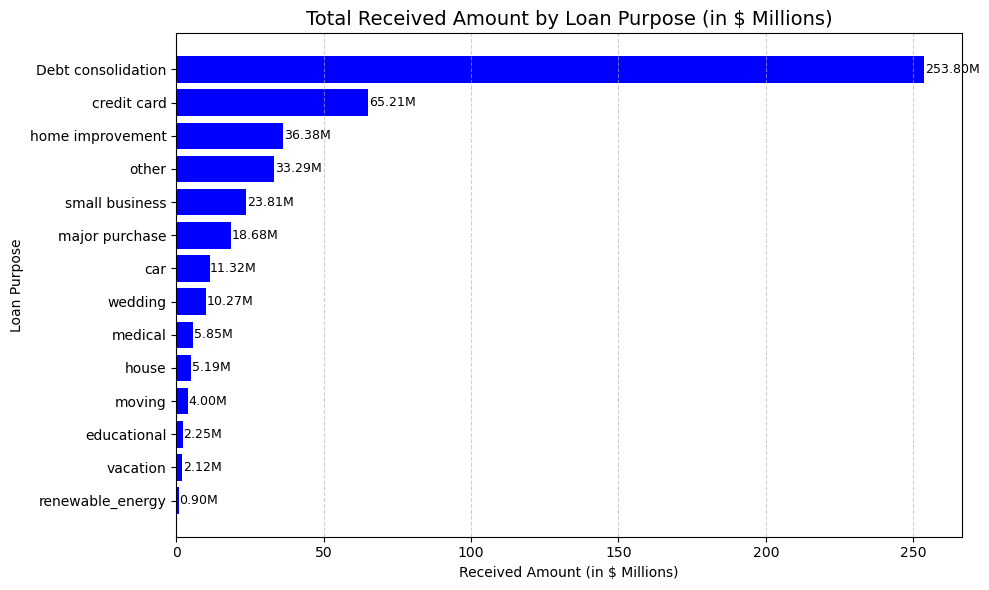

In [155]:
purpose_received_millions = df.groupby("purpose")["total_payment"].sum().sort_values() / 1000000

plt.figure(figsize=(10, 6))
bars = plt.barh(purpose_received_millions.index, purpose_received_millions.values, color = "blue")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height() / 2,
            f'{width:.2f}M', va="center", fontsize =9)

plt.title("Total Received Amount by Loan Purpose (in $ Millions)", fontsize =14)
plt.xlabel("Received Amount (in $ Millions)")
plt.ylabel("Loan Purpose")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### Loan Purpose for Total Loan Application

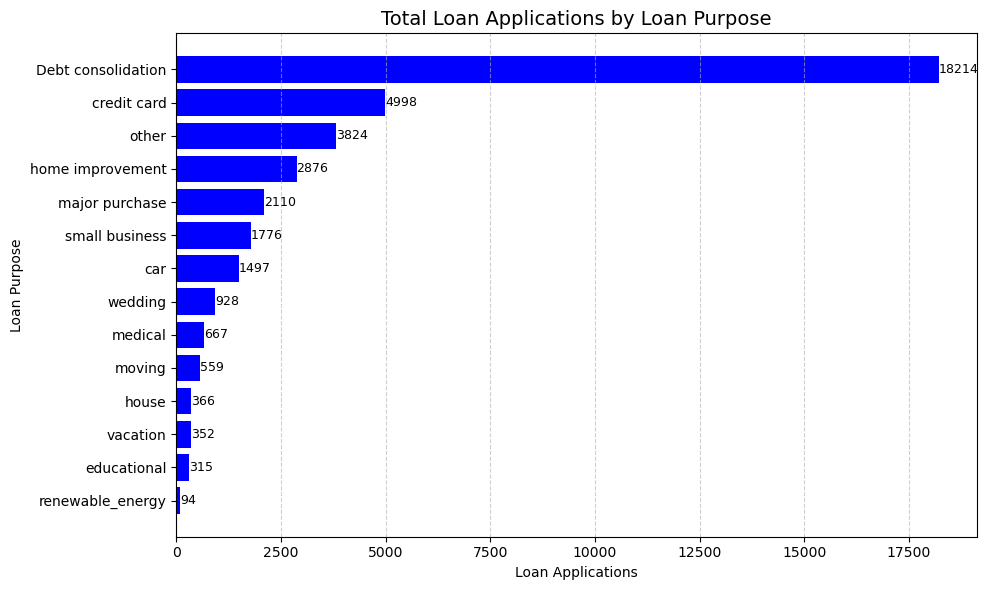

In [161]:
purpose_application = df.groupby("purpose")["id"].count().sort_values() 

plt.figure(figsize=(10, 6))
bars = plt.barh(purpose_application.index, purpose_application.values, color = "blue")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height() / 2,
            f'{width:}', va="center", fontsize =9)

plt.title("Total Loan Applications by Loan Purpose", fontsize =14)
plt.xlabel("Loan Applications")
plt.ylabel("Loan Purpose")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### Home Ownership Analysis for Total Funded Amount

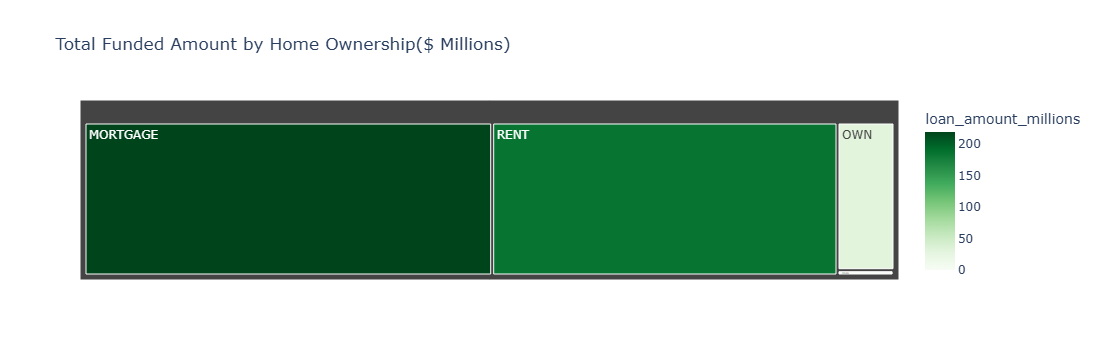

In [167]:
home_funded = df.groupby("home_ownership")["loan_amount"].sum().reset_index()
home_funded["loan_amount_millions"] = home_funded["loan_amount"] / 1000000

fig = px.treemap(
    home_funded,
    path = ["home_ownership"],
    values = "loan_amount_millions",
    color = "loan_amount_millions",
    color_continuous_scale = "Greens",
    title = "Total Funded Amount by Home Ownership($ Millions)"
)

fig.show()

### Home Ownership Analysis for Total Received Amount

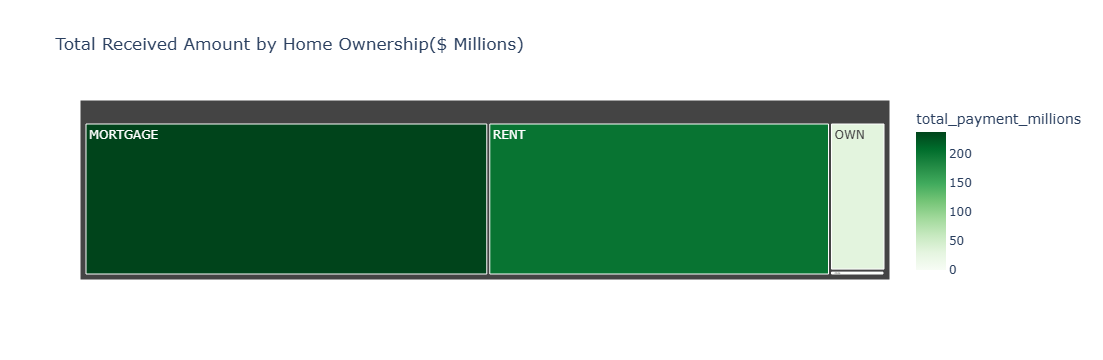

In [169]:
home_received = df.groupby("home_ownership")["total_payment"].sum().reset_index()
home_received["total_payment_millions"] = home_received["total_payment"] / 1000000

fig = px.treemap(
    home_received,
    path = ["home_ownership"],
    values = "total_payment_millions",
    color = "total_payment_millions",
    color_continuous_scale = "Greens",
    title = "Total Received Amount by Home Ownership($ Millions)"
)

fig.show()

### Home Ownership Analysis for Total Loan Applications

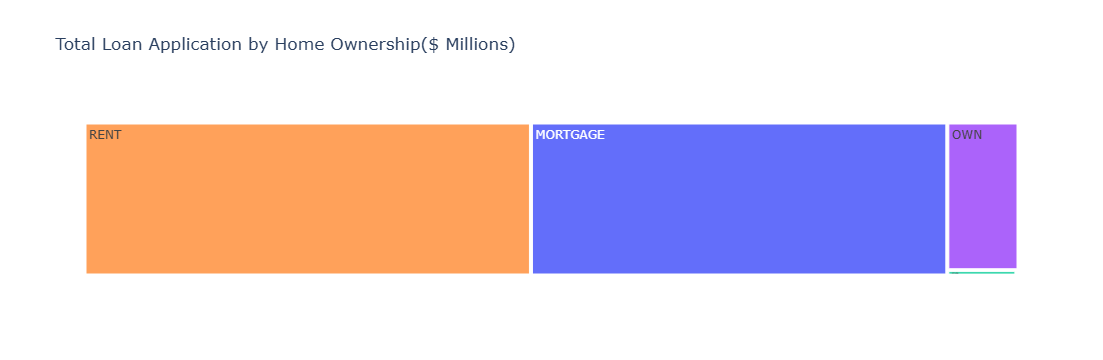

In [178]:
home_applications = df.groupby("home_ownership")["id"].count().reset_index()

fig = px.treemap(
    home_applications,
    path = ["home_ownership"],
    values = "id",
    color = "id",
    title = "Total Loan Application by Home Ownership($ Millions)"
)

fig.show()